# Chapter 1: Hypothesis Testing & Maximum Likelihood

In this chapter we'll explore hypothesis testing.
- Hypothesis testing including (Yannick):
    - p-values
    - pro's and cons
- Maximum likelihood including (Sander en Olivier):
    - Connection to least-squares
    - Connection to generative model (e.g., Hogg et al. article)
    - Confidence intervals ("a frequentist recipe")

## Hypothesis Testing

A **hypothesis** is a statement regarding a population parameter. The hypothesis test is used to make a decision, based on a sample from the population, which of the hypotheses is true; either the **Nullhypothesis** or the **Alternative hypothesis**.

The null hypothesis is the default assumption that there is no relationship between two measured phenomena and is denoted as $H_0$. The alternative hypothesis is the complement of the null hypothesis and is denoted as $H_1$. Let us note this in a more formal mathematical manner.

Let $\theta$ denote the hypothesis and let us partition the parameter space $\Theta$ into two complementary sets, $\Theta_0$ and $\Theta_1$, such that $\Theta_0$+$\Theta_1$=$\Theta$. The **hypothesis test** tests

$$H_0:\ \theta\in\Theta_0\ \text{versus}\ H_1:\ \theta\in\Theta_1.$$

For example, $\theta$ may characterize the shift in frequency of light due to differences in velocities of an observer and source (Doppler shift). A sceptical astronomer may be interested to see whether the Doppler shift exists or not. The null hypothesis may then be $H_0: \theta = 0$, implying that there is no shift in frequency while the alternative hypothesis may be $H_1: \theta \neq 0$.

Sticking with this example, if the sceptical astronomer researches this hypothesis thoroughly (with perfect equipment), they will of course find that $\theta\neq0$ since the Doppler effect exists. Hence, the astronomer should **reject** the Null hypothesis. Suppose the sceptical astronomer uses faulty equipment and finds $\theta=0$, they should then (wrongfully) **retain** the Null hypothesis.

This wrongful retention is one of the two errors that can be made in hypothesis testing. Them being a **type I error** and **type II error**. A type I error occurs when the Null hypothesis is rejected when in reality it is true. A type II error occurs when a Null hypothesis is accepted while in reality it is false. In the latter example the astronomer thus makes a type II error, since the Doppler effect is real and thus there *is* a shift in frequency implying that the Null hypothesis should be rejected. These errors have been summarized in the table below.

<center>

|                       | **Retain Null**   | **Reject Null**   |
|-----------------------|-------------------|-------------------|
| **H₀ true**           | Correct          | Type I error      |
| **H₁ true**           | Type II error    | Correct           |

</center>



It should be noted that a null hypothesis can never be accepted. For that to happen, an infinite number of measurements must be made which is of course impossible. It is only possible to find evidence *against* the null hypothesis.

To test a hypothesis a **Test Statistic (TS)** should be made. The test statistic is then used to measure the probability of a measurement outcome, given that the null hypothesis is *true*. This probability is also known as **the p-value** discussed in the next subsection.

The test statistic can be any statistic that combines multiple **random variables** into a single number. This can be for example the median of a dataset, a likelihood ratio, etc. If the probability distribution of the test statistic is known from theory, a probability can be assigned to a given test statistic. If the probability distribution is unknown, **Monte Carlo simulations** can be used assuming $H_0$ is correct. More on this in chapter (HYPERREF NAAR HOOFDSTUK OVER MCMC).

## p-values

As briefly introduced in the previous subsection, the p-value can be defined as follows:

$$\boxed{\textit{the p-value is the probability of measuring a dataset $X$ if the null hypothesis is correct.}}$$

The p-value is derived from the test statistic which is some function that maps the dataset $X$ to a single value. More precisely, it is derived from the probability distribution of the test statistic known from theory or from a Monte Carlo simulation.

The null hypothesis is rejected if the test statistic falls within a predetermined region, called the **rejection region**. Often in literature this rejection region is set at a value for the test statistic, such that the corresponding p-value is less than $0.05$. This limiting value is often called the **significance**.

In scientific articles, often something along the lines of "this null hypothesis is rejected at the $n\ \sigma$ level" is stated. This simply means that the observed result is significant to a degree where the probability of it occurring due to random chance corresponds to a deviation of $n\sigma$ from the mean of a normal distribution. For example: $1\ \sigma$ would correspond to a confidence level of $68.3\%$, $3\ \sigma$ corresponds to $99.7\%$, etc.

## Advantages and Disadvantages of Hypothesis Testing

The main advantage of hypothesis testing is that it provides a structured framework for decision-making. The steps of hypothesis testing are as follows:

1.  Form a null and alternative hypothesis.

2.  Define a test statistic $T$.

3.  Find the probability distribution of the test statistic.

4.  Compare the test statistic with the probability distribution to find the p-value.

In addition, the concept of p-values is widely known across disciplines.

Hypothesis testing has some notable downsides. One major issue is that statistical tests are often applied more than necessary. In many situations, confidence intervals or estimation methods might be more appropriate. If you don't have a clear, meaningful hypothesis, don't need to make a definitive yes-or-no decision, or aren't concerned about error probabilities, then hypothesis testing might not be the right approach for your needs.

Another issue around p-values is the misinterpretation of them. The p-value is *not* the probability of $H_0$ being correct. This is a mistake often found in articles. It is strictly the probability of measuring a dataset $X$ *if* the null hypothesis is correct based on the defined test statistic (with explicit emphasis on the word *if*). The true definition of the p-value is thus a bit of an awkward one and should therefore be used with caution when communicating with a wider audience consisting of not only those educated in statistics.

Scientific fields like psychology and medicine have faced a major challenge called the replication crisis due to this misinterpretation of p-values. Here, many high-profile findings couldn't be reproduced, even with large samples and identical methods. This revealed that a significant number of "discoveries\" might actually be false positives, despite being widely accepted and forming the basis of extensive research. Several factors contribute to this problem, both unintentional and deliberate:

1.  Multiple Testing: Many studies fail to account for the fact that testing multiple hypotheses increases the likelihood of false positives. This oversight is often due to inadequate education in statistics.

2.  Publication Bias: Journals prioritize significant results, leading to the "file drawer effect\", where studies with non-significant findings remain unpublished. As a result, the scientific record is biased toward positive results.

3.  Incentives and Misconduct: Researchers may unintentionally or deliberately engage in practices like:

    -   HARKing (Hypothesizing After Results are Known): Creating hypotheses based on the data after seeing the results, which undermines the validity of the conclusions.

    -   p-hacking: Manipulating data or analysis (e.g., excluding outliers or changing variables) to achieve statistically significant results.

These issues have started to gain attention in recent years, prompting efforts to improve research practices. While fields like astronomy and physics have been less affected, they are not immune. The lesson is clear: small shortcuts or biases can accumulate and harm the integrity of science.

## Example: sceptical astronomer

Let's return to the example of the sceptical astronomer. Suppose the astronomer has a dataset of $N=100$ measurements of the Doppler shift. He lets the velocity difference between the observer and source be $50 \text{km s}^{-1}$. Let us assume that the source is a hydrogen atom transitioning from the $n=3$ to the $n=2$ orbital, generating a photon with a wavelength of $\lambda_0=656.279$ nm. The astronomer wants to test the hypothesis that the Doppler shift is zero. Since this is an illustration of hypothesis testing, we will generate the data using the Doppler shift formula and then perform a hypothesis test on it.

Let us assume the uncertainty in the measurements is due to the equipment and is $1$ nm (a relatively large uncertainty when the shift will be around $0.1$ nm). We will generate the data and plot it below.

In [98]:
import numpy as np
import astropy.constants as c
import astropy.units as u
import matplotlib.pyplot as plt

# LaTeX rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 14})

def doppler_shift(dv, f_0):
    return (1+dv/c.c)*f_0

# Generate some data
np.random.seed(42)

# Balmer alpha line
lambda_0 = 656.279*u.nm

# Doppler shift
f_0 = c.c/lambda_0
dv = 50*u.km/u.s
f = doppler_shift(dv, f_0)

# Convert to wavelength
lam = c.c/f

# Add noise
noise = np.random.normal(0, 1, 100) * u.nm
data = lam + noise

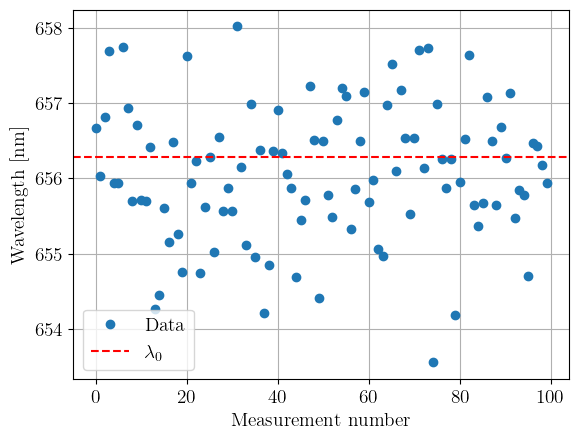

In [99]:
plt.plot(data, 'o', label='Data')
plt.xlabel('Measurement number')
plt.ylabel('Wavelength [nm]')
plt.grid()
plt.axhline(lambda_0.value, color='r', linestyle='--', label=r'$\lambda_0$')
plt.legend()
plt.show()

We can use the test statistic $T$ as the mean of the data. The p-value is then the probability of measuring a dataset with a mean equal to or more extreme than the observed mean, given that the null hypothesis is true. We will perform this test below.

A test statistic $T$ of this form can be defined as

$$T = \frac{\text{Observed statistic}-\text{Expected statistic}}{\text{Standard deviation of statistic}}$$

In this case, the expected statistic is the mean of the data under the null hypothesis ($\lambda_0$), the observed statistic is the mean of the data, and the standard deviation of the statistic is the standard deviation of the data divided by the square root of the number of measurements.

In [100]:
from scipy.stats import norm

# Compute the standard error (SE) assuming constant measurement uncertainty
std_dev = np.std(data)          # Standard deviation of our simulated data
n = len(data)                   # Number of observations
se = std_dev / np.sqrt(n)       # Standard error

# Compute the observed test statistic
T = (np.mean(data) - lambda_0) / se

# Calculate the two-tailed p-value
p_value = 2 * (1 - norm.cdf(abs(T)))

print(f'Test statistic: {T:.2f}')
print(f'p-value: {p_value:.5e}')

Test statistic: -2.36
p-value: 1.82584e-02


Let's recap for a minute what we have done. We have generated a dataset of 100 measurements of the Doppler shift of a hydrogen atom. We have then calculated the test statistic $T$ as the mean of the data and the p-value as the probability of measuring a dataset with a mean equal to or more extreme than the observed mean, given that the null hypothesis is true. We found that the p-value is $1.8\%$. This is a small probability given that our uncertainty per measurement is $1$ nm and only 100 datapoints were simulated.

## Maximum likelihood

### Least-squares
### Generative model
### Confidence intervals

**Sources:**
- Hogg et al. (2010) Data analysis recipes: Fitting a model to data
- Statistical inference, Casella & Berger (2002)
- Mathematical Statistics with Applications, Wackerly et al. (2008)
- All of Statistics, Wasserman (2004)
